In [1]:
include("../source/spin-1_XY_ED.jl")

odlro_matrix (generic function with 1 method)

In [2]:
N = 8
J1,J3,D,h = 1.0,0.1,0.1,1.0
boundary = "OBC"
use_sparse = false
basis_list = gen_basis_full_1D(N)
neel_state = nematic_neel_1D(N,basis_list)

time_list::Vector{Float64} = Vector{Float64}((LinRange(0,30,600)))
n_t = length(time_list)
t_step = time_list[2]-time_list[1];
# t_step = 

In [3]:
@time begin
    J2_list::Vector{Float64} = Vector{Float64}((LinRange(0.01,0.2,30)))
    J2_neel_fidelity_list::Vector{Vector{Float64}} = Vector{Vector{Float64}}(undef,length(J2_list))
    
    for (pos,J2) in enumerate(J2_list)    
        top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\OBC")
        neel_evolved_file = joinpath(top_folder,"neel_t_evolved_state",
        "evolved_state_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_J2=$(round(J2,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_tstep=$(round(t_step,digits=6)).jld2")
        neel_evolved_state_list = JLD2.load(neel_evolved_file)["evolved_state_list"]        

        neel_fidelity_list::Vector{Float64} = Vector{Float64}(undef,n_t)
        for i in 1:n_t
            neel_t_evolved_state = neel_evolved_state_list[i]
            neel_fidelity_list[i] = abs2(dot(neel_state,neel_t_evolved_state))
        end
        J2_neel_fidelity_list[pos] = neel_fidelity_list
    end
end;

 20.859548 seconds (5.75 M allocations: 1.966 GiB, 6.98% gc time, 11.62% compilation time: 38% of which was recompilation)


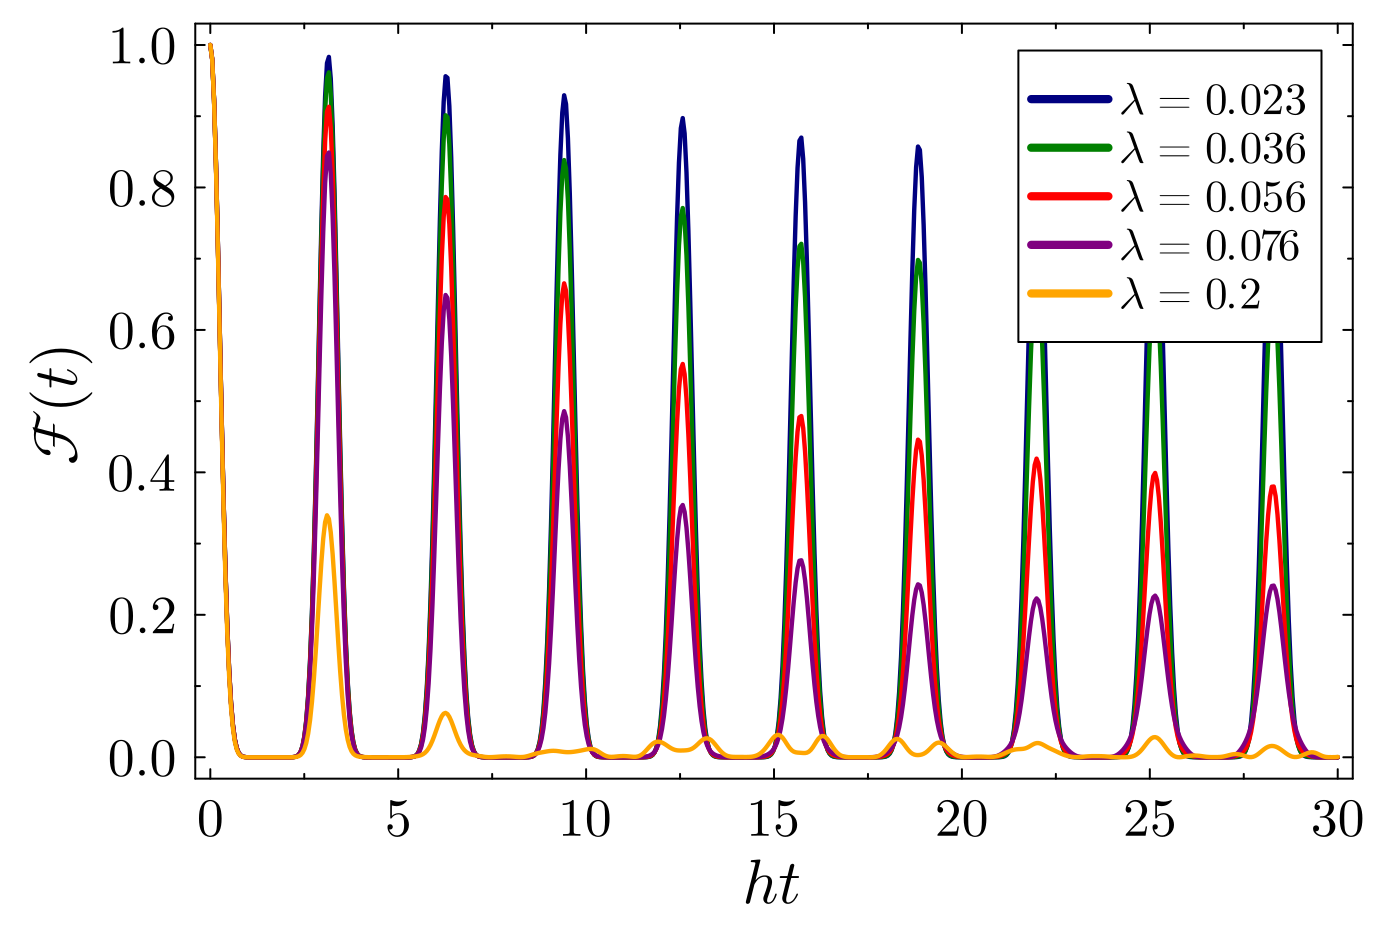

In [4]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)
default(fontfamily="Computer Modern")

n1,n2,n3,n4,n5 = 3,5,8,11,30
J2_1 = round(J2_list[n1],digits=3)
J2_2 = round(J2_list[n2],digits=3)
J2_3 = round(J2_list[n3],digits=3)
J2_4 = round(J2_list[n4],digits=3)
J2_5 = round(J2_list[n5],digits=3)
# J2_6 = round(J2_list[6],digits=2)

p = plot(h*time_list,J2_neel_fidelity_list[n1],lw=2.2,c=:navy,label="\$\\lambda=$(J2_1)\$",
                                                                    size=plot_size,dpi=200)
plot!(h*time_list,J2_neel_fidelity_list[n2],lw=2.2,c=:green,label="\$\\lambda=$(J2_2)\$")
plot!(h*time_list,J2_neel_fidelity_list[n3],lw=2.2,c=:red,label="\$\\lambda=$(J2_3)\$")
plot!(h*time_list,J2_neel_fidelity_list[n4],lw=2.2,c=:purple,label="\$\\lambda=$(J2_4)\$")
plot!(h*time_list,J2_neel_fidelity_list[n5],lw=2.2,c=:orange,label="\$\\lambda=$(J2_5)\$")
# plot!(h*time_list,J2_neel_fidelity_list[6],lw=2.2,c=:cyan,label="\$\\lambda=$(J2_6)\$")

plot!(left_margin=5mm,right_margin=4mm,top_margin=1mm,bottom_margin=4mm)
plot!(framestyle=:box)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
plot!(legend_position=(0.8,0.9),legendfontsize=15,legend_background_color=:white,legend_foreground_color=:black)

xlabel!("\$ht\$",guidefontsize=21)
ylabel!("\$\\mathcal{F}(t)\$",guidefontsize=21)
title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 0,5,30
y1,y_step,y2 = 0.0,0.2,1.0
xticks = (x1:x_step:x2,[@sprintf("%.0f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.1f",y) for y in y1:y_step:y2])
xminor_ticks = 2 
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=17,tick_direction=:in)
plot!(xlims=(-0.4,x2+0.4))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\fidelity_decay"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Fidelity_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)

In [4]:
# J2_list::Vector{Float64} = Vector{Float64}((LinRange(0.01,0.2,30)))
peak_time_list::Vector{Float64} = Vector{Float64}(undef,length(J2_list))
peak_fidelity_list::Vector{Float64} = Vector{Float64}(undef,length(J2_list))

for (i,J2) in enumerate(J2_list)
    peak_time,peak_fidelity = fidelity_first_peak(h*time_list,J2_neel_fidelity_list[i])
    peak_time_list[i] = peak_time
    peak_fidelity_list[i] = peak_fidelity
end    

In [5]:
sq_J2_list = (J2_list).^2
inv_peak_fidelity_list = 1.0./(peak_fidelity_list)
lin_params_1 = fit(sq_J2_list,peak_fidelity_list,1)   # Linear fit
lin_params_2 = fit(sq_J2_list,peak_fidelity_list,2)   # Polynomial fit
fitted_peak_fidelity_list_1 = lin_params_1.(sq_J2_list)
fitted_peak_fidelity_list_2 = lin_params_2.(sq_J2_list);

In [6]:
lin_params_2

Polynomial(0.9929324888301071 - 26.000356637498427*x + 247.42082298146659*x^2)

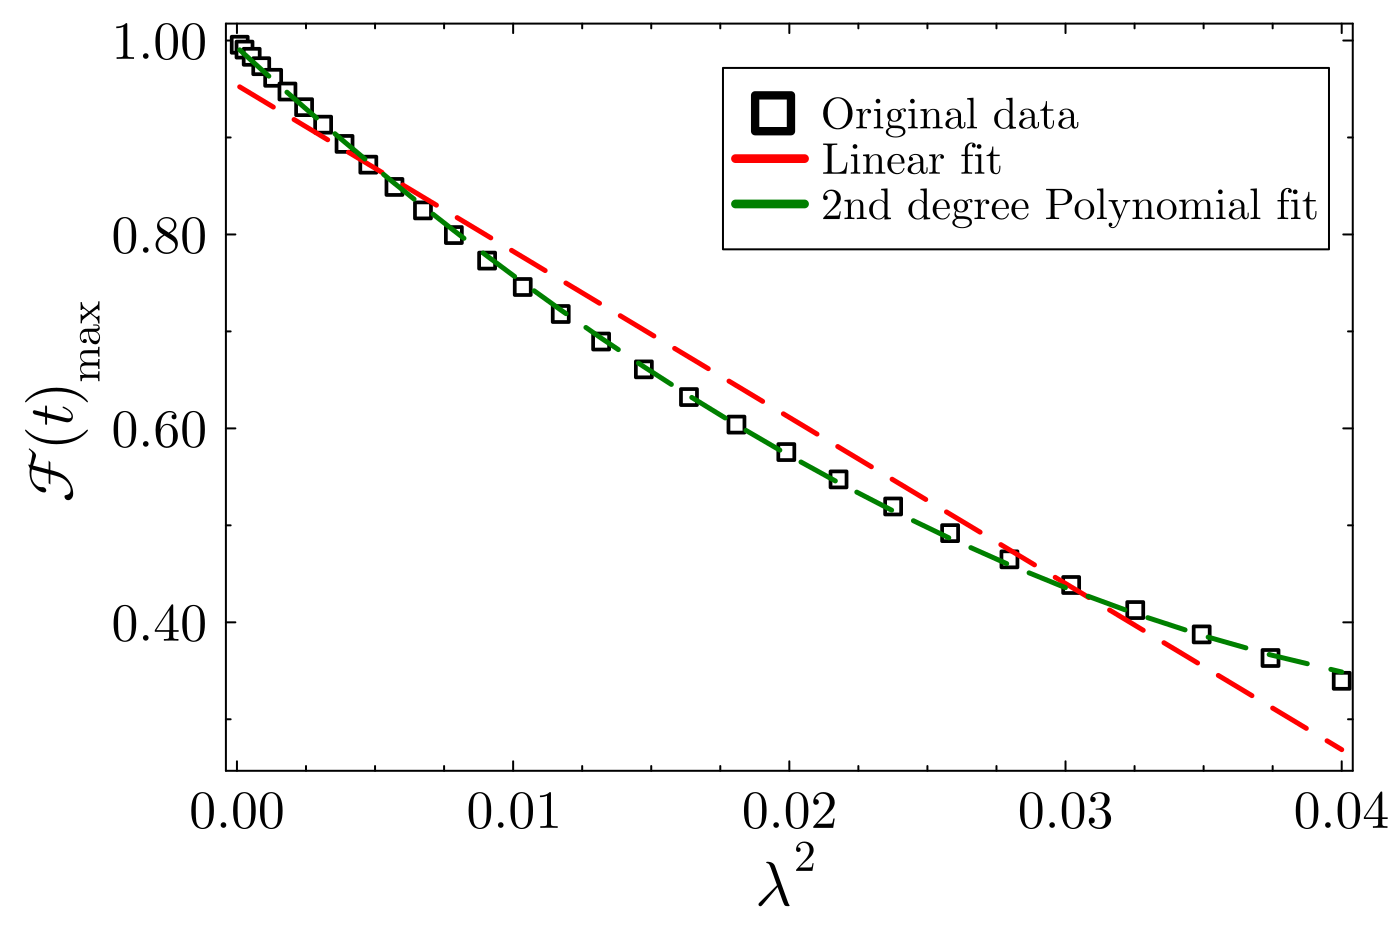

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=8\\sec_nbr_perturbed\\OBC\\fidelity_decay\\Fidelity_Decay_J1=1.0_J3=0.1_J2_D=0.1_h=1.0.png"

In [12]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)
default(fontfamily="Computer Modern")

p = scatter(sq_J2_list,peak_fidelity_list,marker=:square,markercolor=:white,ms=4,markerstrokewidth=2,
              label="Original data",size=plot_size,dpi=200)
plot!(sq_J2_list,fitted_peak_fidelity_list_1,lw=2.5,c=:red,ls=:dash,
       label="Linear fit")
plot!(sq_J2_list,fitted_peak_fidelity_list_2,lw=2.5,c=:green,ls=:dash,
       label="2nd degree Polynomial fit")

plot!(left_margin=5mm,right_margin=4mm,top_margin=1mm,bottom_margin=5mm)
plot!(framestyle=:box)
plot!(legend=false)
plot!(legend_position=(0.53,0.88),legendfontsize=14,legend_background_color=:white,legend_foreground_color=:black)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\$\\lambda^2\$",guidefontsize=21)
ylabel!("\$\\mathcal{F}(t)_{\\mathrm{max}}\$",guidefontsize=21)

x1,x_step,x2 = 0,0.01,0.04
y1,y_step,y2 = 0.4,0.2,1
xticks = (x1:x_step:x2,[@sprintf("%.2f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.2f",y) for y in y1:y_step:y2])
xminor_ticks = 4 
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=17,tick_direction=:in)
plot!(xlims=(x1-0.0004,x2+0.0004))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\fidelity_decay"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Fidelity_Decay_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_J2_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)